In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline

In [2]:
# サイクルあたりのステップ数
steps_per_cycle = 50
# 生成するサイクル数
number_of_cycles = 100

In [3]:
df = pd.DataFrame(np.arange(steps_per_cycle * number_of_cycles + 1), columns=["t"])
df.head()

,t
0,0
1,1
2,2
3,3
4,4


In [4]:
df["sin_t"] = df.t.apply(lambda x: math.sin(x * (2 * math.pi / steps_per_cycle)))

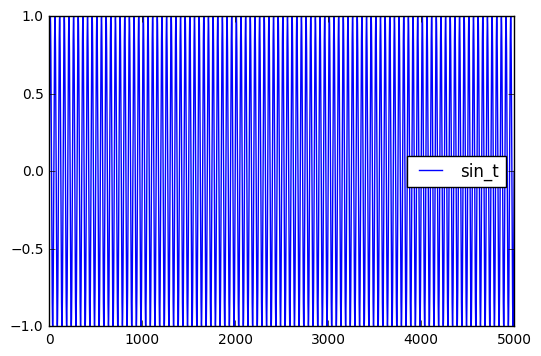

In [5]:
df[["sin_t"]].plot()

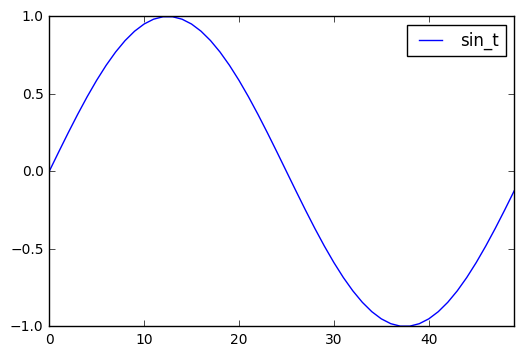

In [6]:
df[["sin_t"]].head(steps_per_cycle * 1).plot()

In [7]:
df["sin_t+1"] = df["sin_t"].shift(-1)

In [8]:
df.tail()

,t,sin_t,sin_t+1
4996,4996,-4.817537e-01,-3.681246e-01
4997,4997,-3.681246e-01,-2.486899e-01
4998,4998,-2.486899e-01,-1.253332e-01
4999,4999,-1.253332e-01,3.928773e-15
5000,5000,3.928773e-15,NaN


In [9]:
df.dropna(inplace=True)
df.tail()

,t,sin_t,sin_t+1
4995,4995,-0.587785,-4.817537e-01
4996,4996,-0.481754,-3.681246e-01
4997,4997,-0.368125,-2.486899e-01
4998,4998,-0.248690,-1.253332e-01
4999,4999,-0.125333,3.928773e-15


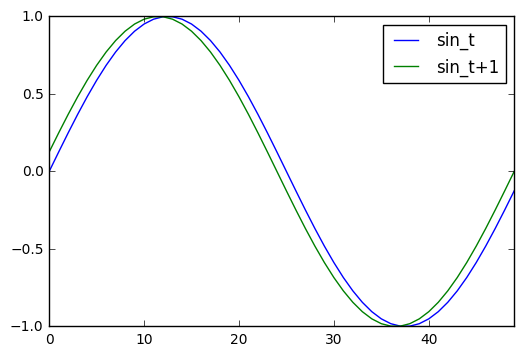

In [10]:
df[["sin_t", "sin_t+1"]].head(steps_per_cycle).plot()

In [11]:
matrix = df[["sin_t", "sin_t+1"]].as_matrix()
matrix

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [12]:
np.save("sin.npy", matrix)

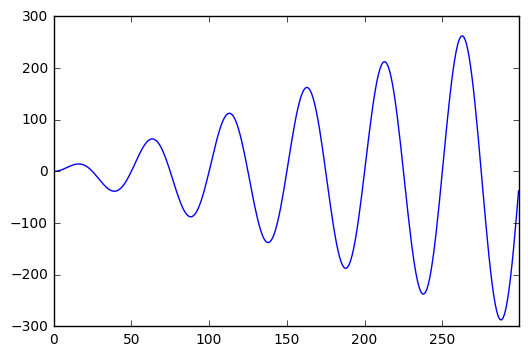

In [18]:
#### x * sin(x)
df["t_sin_t"] = df.t.apply(lambda x: x*math.sin(x * (2 * math.pi / steps_per_cycle)))
df['t_sin_t'].head(steps_per_cycle*6).plot()

In [21]:
df['t_sin_t+1'] = df['t_sin_t'].shift(-1)
df.tail()

,t,sin_t,sin_t+1,t_sin_t,t_sin_t+1
4995,4995,-0.587785,-4.817537e-01,-2935.987335,-2406.841356
4996,4996,-0.481754,-3.681246e-01,-2406.841356,-1839.518390
4997,4997,-0.368125,-2.486899e-01,-1839.518390,-1242.952056
4998,4998,-0.248690,-1.253332e-01,-1242.952056,-626.540835
4999,4999,-0.125333,3.928773e-15,-626.540835,NaN


In [25]:
df.dropna(inplace=True)
df.tail()

,t,sin_t,sin_t+1,t_sin_t,t_sin_t+1
4994,4994,-0.684547,-0.587785,-3418.628247,-2935.987335
4995,4995,-0.587785,-0.481754,-2935.987335,-2406.841356
4996,4996,-0.481754,-0.368125,-2406.841356,-1839.518390
4997,4997,-0.368125,-0.248690,-1839.518390,-1242.952056
4998,4998,-0.248690,-0.125333,-1242.952056,-626.540835


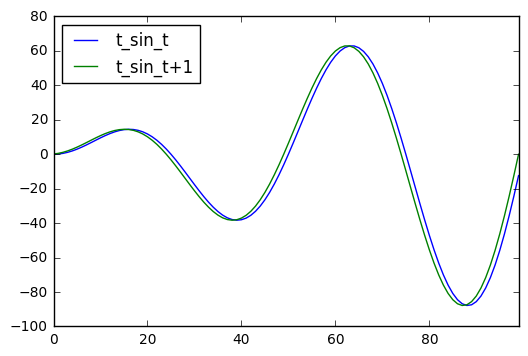

In [29]:
df[['t_sin_t','t_sin_t+1']].head(steps_per_cycle*2).plot()

In [31]:
matrix = df[['t_sin_t','t_sin_t+1']].as_matrix()
np.save('xsinx.npy', matrix)

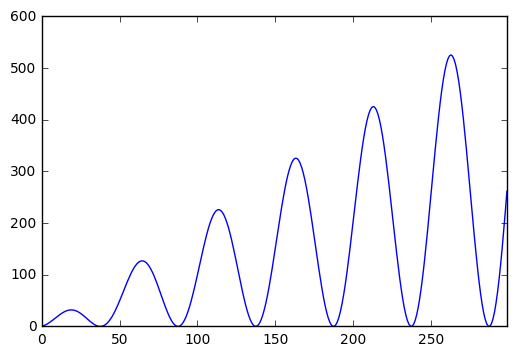

In [33]:
### t * sin(t) + t
df["t_sin_t+t"] = df.t.apply(lambda x: x*math.sin(x * (2 * math.pi / steps_per_cycle)) + x)
df["t_sin_t+t"].head(steps_per_cycle*6).plot()

In [36]:
df['t_sin_t+t+1'] = df['t_sin_t+t'].shift(-1)
df.dropna(inplace=True)
df.tail()

,t,sin_t,sin_t+1,t_sin_t,t_sin_t+1,t_sin_t+t,t_sin_t+t+1
4991,4991,-0.904827,-0.844328,-4515.991819,-4214.885004,475.008181,777.114996
4992,4992,-0.844328,-0.770513,-4214.885004,-3847.172621,777.114996,1145.827379
4993,4993,-0.770513,-0.684547,-3847.172621,-3418.628247,1145.827379,1575.371753
4994,4994,-0.684547,-0.587785,-3418.628247,-2935.987335,1575.371753,2059.012665
4995,4995,-0.587785,-0.481754,-2935.987335,-2406.841356,2059.012665,2589.158644


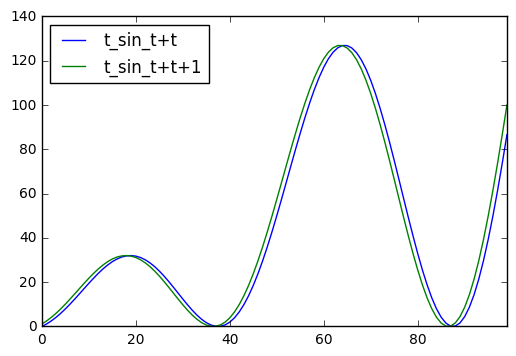

In [38]:
df[['t_sin_t+t', 't_sin_t+t+1']].head(steps_per_cycle*2).plot()

In [39]:
matrix = df[['t_sin_t+t', 't_sin_t+t+1']].as_matrix()
np.save('xsinx+x.npy', matrix)